<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>

<H3 align='center'> Tarea 3 - Ensamblados y modelos avanzados </H3>

<hr style="height:2px;border:none"/>

<center>
    <h4>Victoria Miranda Burgos - 201604521-K</h4>
    <h4>Matías Marchant Ayarza - 201673556-9</h4>
</center>

**Temas**  
* Técnicas de ensamblado: *bagging*, *boosting* y *random forest*.
* Ventajas de técnicas de ensamblados
* Problemas desbalanceados
 

**Formalidades**  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega y cierre competencia: 17 de Enero
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea3-INF393-II-2019]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Ensamblados para regresión  
[2.](#segundo) Detección de acoso en *Twitter*  

<a id="primero"></a>
## 1. Ensamblados para regresión
---
Las técnicas de ensamblados vistos en clases pueden ser aplicadas tanto a problemas de clasificación o regresión, teniendo la ventaja de utilizar múltiples modelos de aprendizaje para utilizar la ventaja de cada uno. En este actividad se trabajará con predecir la temperatura media de un día, dada cierta información del día anterior, como la humedad, velocidad del viento, presión atmosférica, fecha y temperatura. El modelo predictor derivado puede ser bastante útil para conocer el comportamiento del clima a lo largo del tiempo.

<img src="https://scijinks.gov/review/forecast-reliability/forecast-reliability2.jpg" title="Title text" width="70%"  />

Los datos de clima son recolectados en la ciudad Delhi de India por un período de 4 años (2013 a 2017), proporcionados en Kaggle a través del siguiente __[link](https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data)__, las particiones de entrenamiento y prueba están dadas. El registro de cada dato corresponde a un día, incrementando a través de las filas por cada día.

---

>  Cargue los datos en un dataframe de pandas, además agregue una columna indicando el valor a predecir, la temperatura media del día siguiente. *Como el último dato/registro no tiene un valor a predecir éste se elimina*.

In [1]:
import pandas as pd
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df["y_value"] = df["meantemp"].shift(-1)
df = df.iloc[:-1] #remove last row

In [2]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,y_value
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,7.400000
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,7.166667
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,8.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,6.000000
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,7.000000


> Debido a la poca información que se tiene a través de los 4 parámetros medidos, extraíga más información a través de los datos de fecha. Por ejemplo, el comportamiento a través de los meses y años varía, así como la información de la temporada del año podría ayudar a la predicción. Decida si puede incluir más información a partir de la fecha que tenga sentido con el problema.

In [3]:
#procesamiento de fecha(datetime/timestamp) a numeros
df["date"] = pd.to_datetime(df["date"])
df['cday'] = df['date'].dt.dayofweek #0:lunes,6:domingo
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month #1:enero, 12: diciembre
#based on: https://en.wikipedia.org/wiki/Climate_of_India
seasons = ["winter","winter","summer","summer","summer","rainy","rainy","rainy","fall","fall","fall","winter"]
df['season'] = [ seasons[month_i - 1] for month_i in df['month'].values ]
df = pd.get_dummies(df,columns=['season']) #to one hot.. as nominal variable
#any more information?
df.drop(["date"], axis=1, inplace=True) #delete date

In [4]:
df.head()

,meantemp,humidity,wind_speed,meanpressure,y_value,cday,year,month,season_fall,season_rainy,season_summer,season_winter
0,10.000000,84.500000,0.000000,1015.666667,7.400000,1,2013,1,0,0,0,1
1,7.400000,92.000000,2.980000,1017.800000,7.166667,2,2013,1,0,0,0,1
2,7.166667,87.000000,4.633333,1018.666667,8.666667,3,2013,1,0,0,0,1
3,8.666667,71.333333,1.233333,1017.166667,6.000000,4,2013,1,0,0,0,1
4,6.000000,86.833333,3.700000,1016.500000,7.000000,5,2013,1,0,0,0,1


> Cree las matrices de entrenamiento, con los mil primeros registros, y de validación, con el resto. Para evitar el orden natural en que vienen los datos entrenados, realice un *shuffle* aleatorio.

In [5]:
y = df.pop("y_value").values
X = df.values 
X_train = X[:1000]
y_train = y[:1000]
X_val = X[1000:]
y_val = y[1000:]
print(df.shape[0])
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0) #shuffle values on train only

1461


> a) Describa el problema trabajado, la cantidad de datos que se cuenta como las características a trabajar. Al ser datos temporales podría ayudar una ilustración gráfica de la secuencias trabajadas y su comportamiento ¿Es válido el uso de la información sólo del día anterior?.

Cantidad de datos:  1461


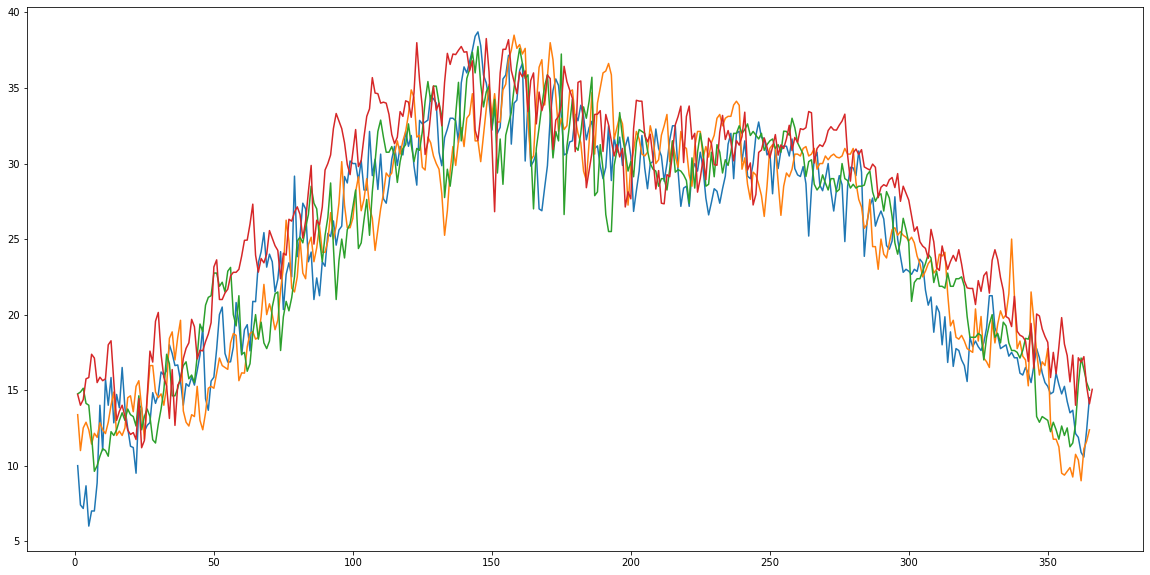

In [37]:
import matplotlib.pyplot as plt

print("Cantidad de datos: ",df.shape[0])
anio2013 = df[:365]["meantemp"]
anio2014 = df[365:(365*2)]["meantemp"]
anio2015 = df[365*2:365*3]["meantemp"]
anio2016 = df[365*3:]["meantemp"]


dias = list(range(1,366))

plt.figure(figsize=(20,10))
plt.plot(dias,anio2013,dias,anio2014,dias,anio2015,list(range(1,367)),anio2016)
plt.show()

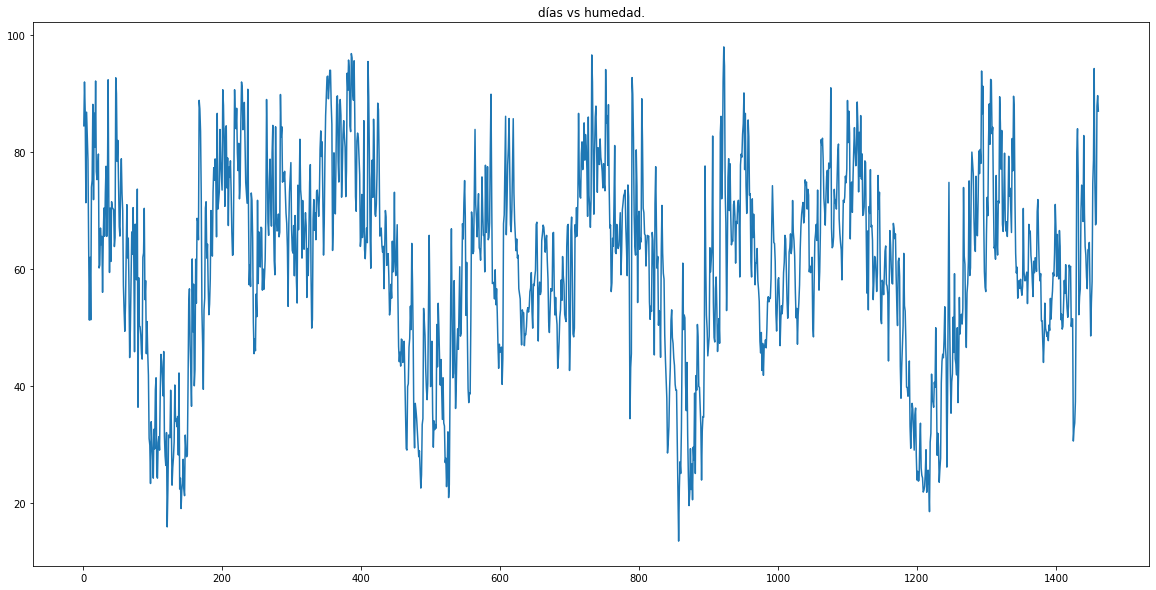

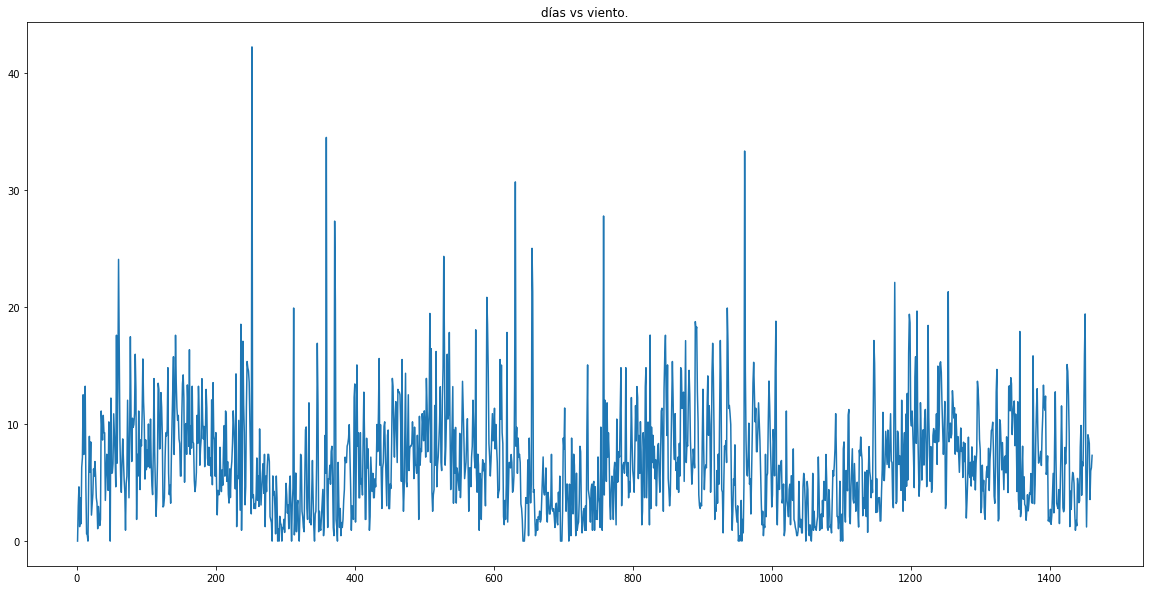

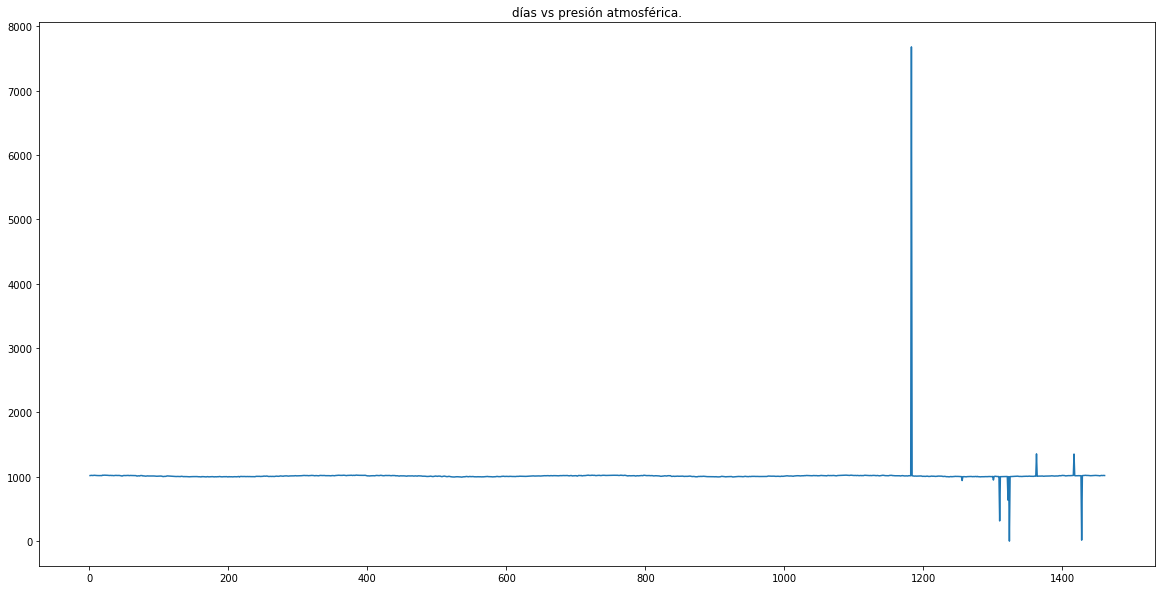

In [38]:
plt.figure(figsize=(20,10))
plt.plot(list(range(1,1462)),df["humidity"])
plt.title("días vs humedad.")
plt.show()

plt.figure(figsize=(20,10))
plt.plot(list(range(1,1462)),df["wind_speed"])
plt.title("días vs viento.")
plt.show()

plt.figure(figsize=(20,10))
plt.plot(list(range(1,1462)),df["meanpressure"])
plt.title("días vs presión atmosférica.")
plt.show()

> b) Entrene un solo Árbol de Regresión de múltiples niveles para resolver el problema. Defina un Árbol **no regularizado** (como el que no tiene límites en su profundidad) y otro Árbol **regularizado** (variando los hiper-parámetros que prefiera, por ejemplo, los más comunes como la profundidad, el número mínimo de datos para realizar *split* o el número mínimo de datos en cada hoja). Además comente sobre la ventaja de usar un árbol de decisión respecto a la escala de los datos ¿Porqué no es necesario escalar los datos?

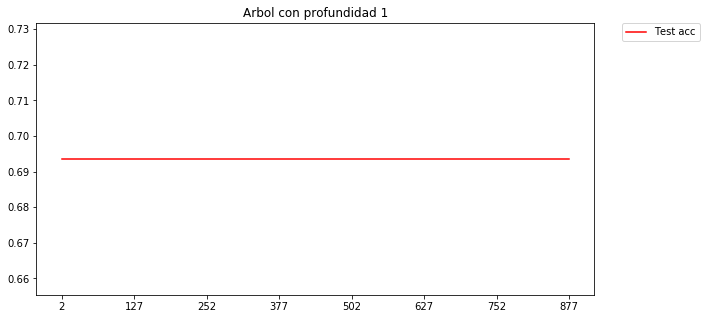

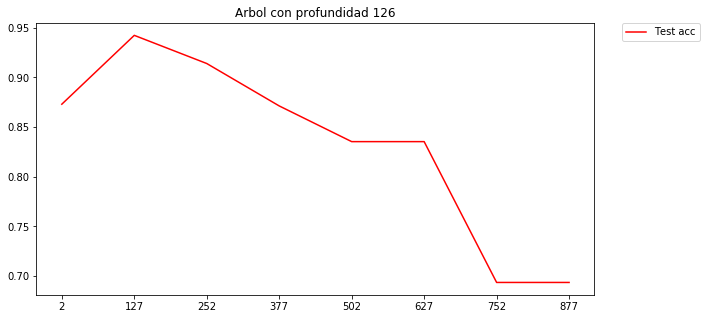

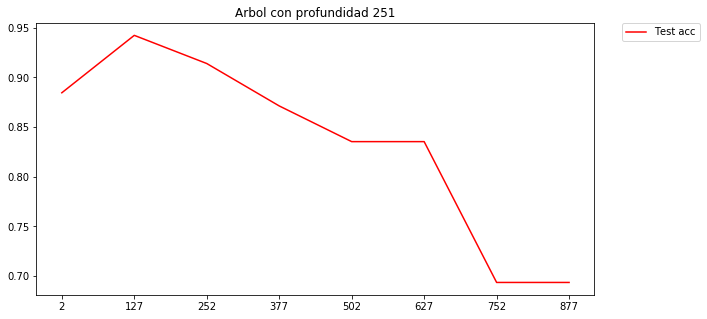

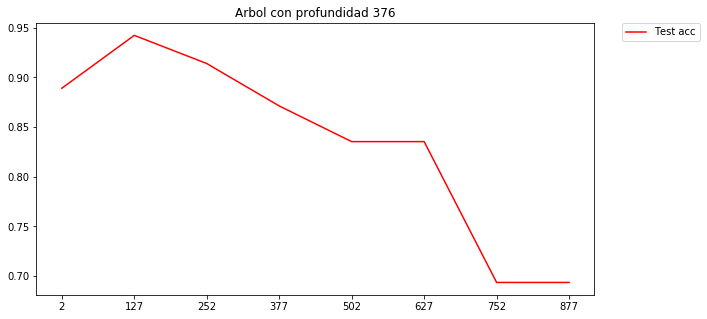

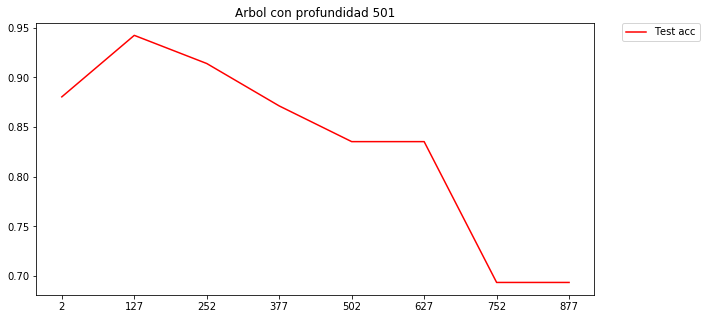

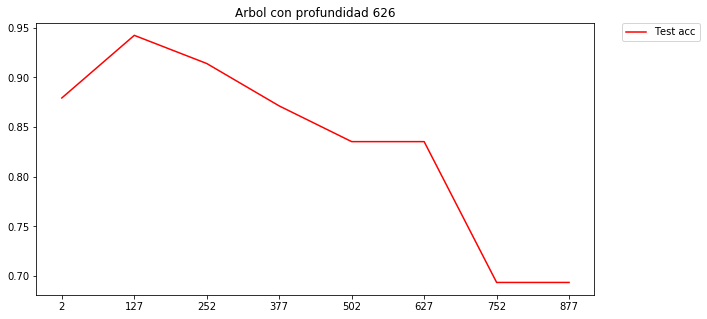

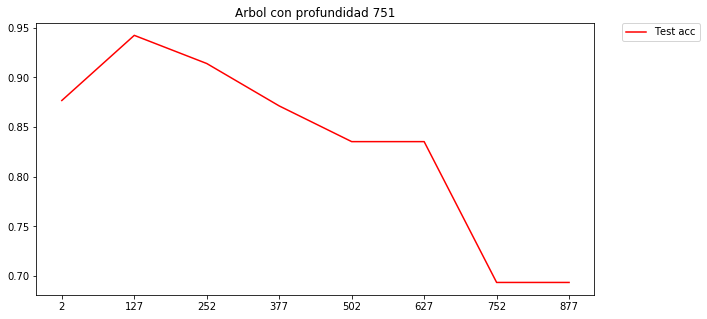

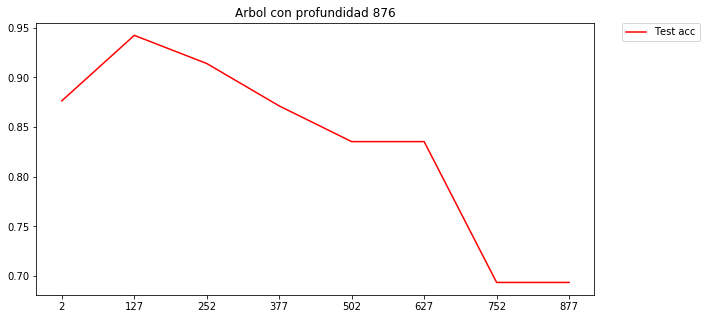

In [8]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

def RMSE(ytrue,ypred):
    return np.sqrt(np.mean(np.square(ytrue - ypred)))

from sklearn.tree import DecisionTreeRegressor as Tree
#unregularized model -- default parameters
model_unr = DecisionTreeRegressor()
model_unr.fit(X_train,y_train)

#define your regularized tree model
particion = len(y_train)/8
Profundidad = [i for i in range(1,len(y_train)+1,int(particion))]
Samples = [i for i in range(2,len(y_train)+1,int(particion))]

for p in Profundidad:
    test_acc_lista = []
    for s in Samples:
        model_reg_try = DecisionTreeRegressor(max_depth = p,
                                          min_samples_split = s)
        model_reg_try.fit(X_train, y_train)
        test_acc = model_reg_try.score(X_val, y_val)
        test_acc_lista.append(test_acc)

    plt.figure(figsize=(10,5))
    best_test_acc_Tree = max(test_acc_lista)

    xi = list(range(1,len(y_train),int(particion)))
    plt.plot(xi, test_acc_lista, linestyle='-', color='r', label='Test acc')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xticks(xi,Samples)
    plt.title("Arbol con profundidad "+str(p))

    plt.show()

**Comentario:** Al parecer, el mejor parámetro min_samples_split es el 127, mientras que el parámetro max_depth no parece importar mucho, ya que entrega el mismo gráfico excepto para max_depth = 1 que es el árbol de 1 nodo. Se usará min_samples_split = 127 y max_depth = 126

In [9]:
model_reg = DecisionTreeRegressor(max_depth = 126,
                                  min_samples_split = 127)
model_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=126, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=127, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

**R:** Los árboles de decisión no requieren de escalamiento de datos, por lo que requieren de menos esfuerzo y preparación que otros métodos. Éstos no requieren de escalamiento porque son "invariantes" a los cambios de los features e inputs. Un arbol divide la data en dos subconjuntos en cada nodo según una característica, por lo que no es necesario realizar ningún cambio, ya que si se le aplica cualquier transformación (mientras se aplique a ambas) se obtendrá el mismo resultado.

> c) Para evaluar la calidad de predicción en este problema se utilizará la métrica *Root Mean Squared Error* (RMSE), indicando un error en la escala real de la temperatura. Como los datos de validación siguen con el orden temporal, visualice esa predicción a lo largo del tiempo. Comente sobre los resultados comparando la regularización *vs* el no regularizar.

In [10]:
y_train_hat_unr = model_unr.predict(X_train)
y_train_hat_reg = model_reg.predict(X_train)
y_val_hat_unr = model_unr.predict(X_val)
y_val_hat_reg = model_reg.predict(X_val)
print("RMSE train unr =", RMSE(y_train,y_train_hat_unr))
print("RMSE train reg =", RMSE(y_train, y_train_hat_reg))
print("RMSE val unr =", RMSE(y_val, y_val_hat_unr))
print("RMSE val reg =", RMSE(y_val, y_val_hat_reg))

RMSE train unr = 0.0
RMSE train reg = 1.7070989149162683
RMSE val unr = 2.38417655837169
RMSE val reg = 1.7026157104098565


**Notar:** El árbol regularizado, obtiene peor rendimiento en los datos del conjunto de entrenamiento, pero mejor rendimiento en el conjunto de datos de validación, definirle parámetros logró menor overfitting que el árbol no regularizado.

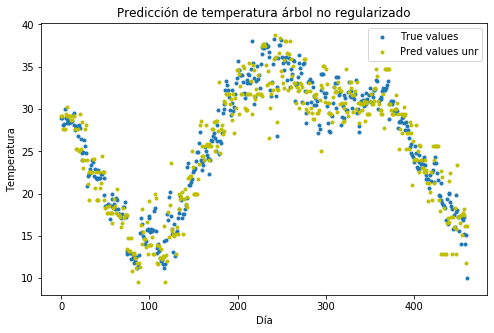

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_val, '.' ,label="True values")
plt.plot(y_val_hat_unr, '.', color = 'y', label = "Pred values unr")
plt.legend()
plt.xlabel("Día")
plt.ylabel("Temperatura")
plt.title("Predicción de temperatura árbol no regularizado")
plt.show()


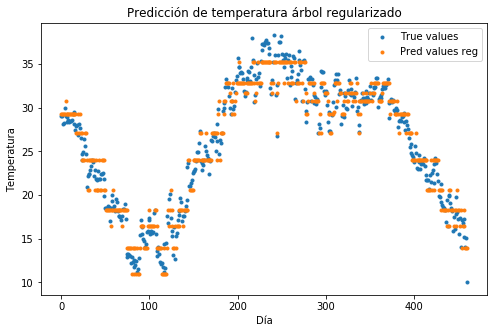

In [12]:
plt.figure(figsize=(8,5))
plt.plot(y_val, '.' ,label="True values")
plt.plot(y_val_hat_reg, '.', label = "Pred values reg")
plt.legend()
plt.xlabel("Día")
plt.ylabel("Temperatura")
plt.title("Predicción de temperatura árbol regularizado")
plt.show()

**R:** El modelo no regularizado pareciese tener varianza mayor, mientras que las predicciones del modelo regularizado no se dispersan demasiado.

> d) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **Bagging**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en b)*) ¿Qué debería suceder? ¿Se visualiza *overfitting*? Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del RMSE de entrenamiento y validación en función de este hiper-parámetro.

In [13]:
from sklearn.ensemble import BaggingRegressor

estimators = np.arange(1,101,10)

bagging_model_unr_train = []
bagging_model_unr_val = []

bagging_model_reg_train = []
bagging_model_reg_val = []

#No regularizado
for i in estimators:
    bagging_model_unr = BaggingRegressor(base_estimator = DecisionTreeRegressor(), n_estimators = i, n_jobs = -1, random_state = 0)
    bagging_model_unr.fit(X_train, y_train)
    bagging_model_unr_train.append(RMSE(y_train, bagging_model_unr.predict(X_train)))
    bagging_model_unr_val.append(RMSE(y_val, bagging_model_unr.predict(X_val)))
    
    base_model_reg = DecisionTreeRegressor(max_depth = 126,
                                           min_samples_split = 127)
    bagging_model_reg = BaggingRegressor(base_estimator = base_model_reg, n_estimators = i, n_jobs = -1, random_state = 0)
    bagging_model_reg.fit(X_train, y_train)
    bagging_model_reg_train.append(RMSE(y_train, bagging_model_reg.predict(X_train)))
    bagging_model_reg_val.append(RMSE(y_val, bagging_model_reg.predict(X_val)))

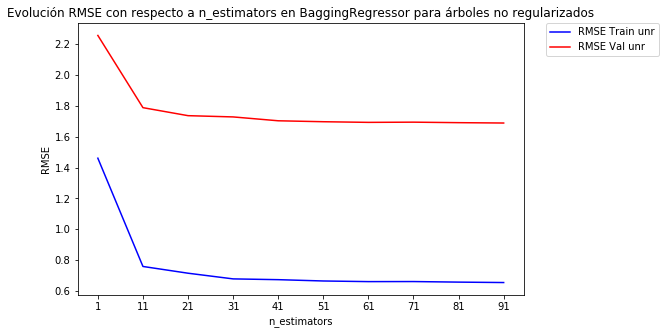

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))

xi = list(range(len(estimators)))
plt.plot(xi, bagging_model_unr_train, linestyle='-', color='b', label='RMSE Train unr')
plt.plot(xi, bagging_model_unr_val, linestyle='-', color='r', label='RMSE Val unr')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(xi, estimators)
plt.xlabel("n_estimators")
plt.ylabel("RMSE")
plt.title("Evolución RMSE con respecto a n_estimators en BaggingRegressor para árboles no regularizados")
plt.show()

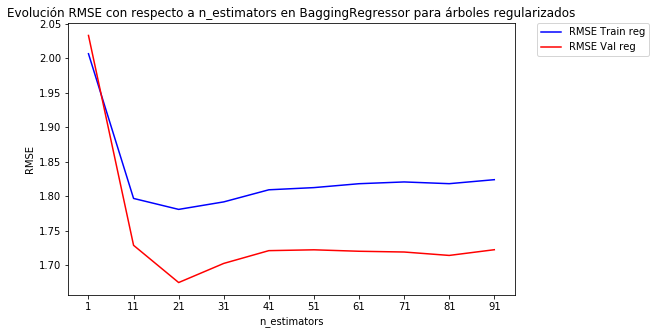

In [15]:
plt.figure(figsize=(8,5))

xi = list(range(len(estimators)))
plt.plot(xi, bagging_model_reg_train, linestyle='-', color='b', label='RMSE Train reg')
plt.plot(xi, bagging_model_reg_val, linestyle='-', color='r', label='RMSE Val reg')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(xi, estimators)
plt.xlabel("n_estimators")
plt.ylabel("RMSE")
plt.title("Evolución RMSE con respecto a n_estimators en BaggingRegressor para árboles regularizados")
plt.show()

**R:** Se esperaba que mientras subía la cantidad de n_estimators, el valor de RMSE bajara.

Según lo observado en el primer gráfico (Árboles no regularizados), el overfitting en el Bagging basado en árboles no regularizados es muy notorio, el RMSE obtenido con el conjunto de validación siempre está casi 0.8 más arriba que el RMSE obtenido por el conjunto de entrenamiento. Algo que me sorprendió fue que el RMSE para el conjunto de entrenamiento para 1 árbol no regularizado, es casi 1.4 más grande usando bagging que el modelo sólo del árbol en el inciso c).

Según lo observado en el segundo gráfico (Árboles regularizados), no existe overfitting. Y se alcanza el mejor modelo bagging con n_estimators = 21.

Según lo que se esperaba, el RMSE se mantuvo bajando para los árboles no regularizados, pero llegó a un mínimo local para árboles regularizados y luego aumentó.

> e) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **AdaBoost**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en d)* ¿Se visualiza *overfitting*? ¿Qué técnica utiliza la librería de sklearn, *re-muestrear* o *pesar* ejemplos? ¿Qué le parece más sensato?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del RMSE de entrenamiento y validación en función de este hiper-parámetro. Compare y analice con la técnica utilizada en d).

In [16]:
from sklearn.ensemble import AdaBoostRegressor

estimators = np.arange(1,101,10)

adaboost_model_unr_train = []
adaboost_model_unr_val = []

adaboost_model_reg_train = []
adaboost_model_reg_val = []

for i in estimators:
    adaboost_model_unr = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(), n_estimators = i, random_state = 0)
    adaboost_model_unr.fit(X_train, y_train)
    adaboost_model_unr_train.append(RMSE(y_train, adaboost_model_unr.predict(X_train)))
    adaboost_model_unr_val.append(RMSE(y_val, adaboost_model_unr.predict(X_val)))
    
    base_model_reg = DecisionTreeRegressor(max_depth = 126,
                                           min_samples_split = 127)
    adaboost_model_reg = AdaBoostRegressor(base_estimator = base_model_reg, n_estimators = i, random_state = 0)
    adaboost_model_reg.fit(X_train, y_train)
    adaboost_model_reg_train.append(RMSE(y_train, adaboost_model_reg.predict(X_train)))
    adaboost_model_reg_val.append(RMSE(y_val, adaboost_model_reg.predict(X_val)))

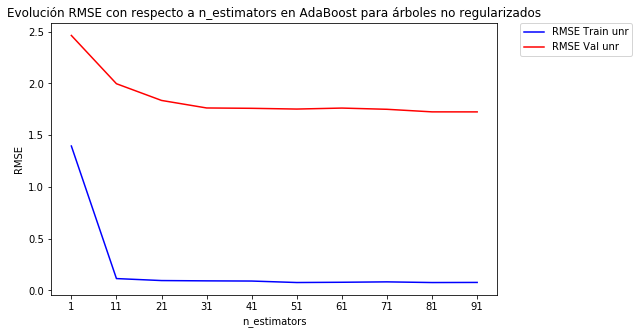

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))

xi = list(range(len(estimators)))
plt.plot(xi, adaboost_model_unr_train, linestyle='-', color='b', label='RMSE Train unr')
plt.plot(xi, adaboost_model_unr_val, linestyle='-', color='r', label='RMSE Val unr')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(xi, estimators)
plt.xlabel("n_estimators")
plt.ylabel("RMSE")
plt.title("Evolución RMSE con respecto a n_estimators en AdaBoost para árboles no regularizados")
plt.show()

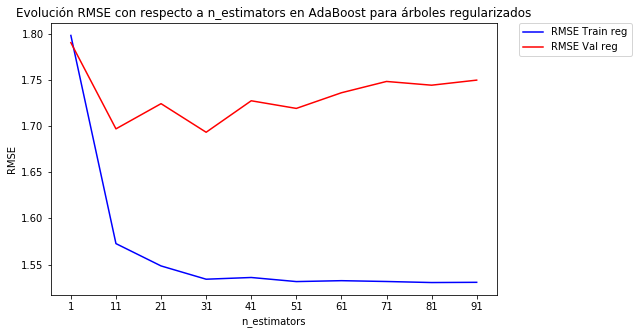

In [18]:
plt.figure(figsize=(8,5))

xi = list(range(len(estimators)))
plt.plot(xi, adaboost_model_reg_train, linestyle='-', color='b', label='RMSE Train reg')
plt.plot(xi, adaboost_model_reg_val, linestyle='-', color='r', label='RMSE Val reg')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(xi, estimators)
plt.xlabel("n_estimators")
plt.ylabel("RMSE")
plt.title("Evolución RMSE con respecto a n_estimators en AdaBoost para árboles regularizados")
plt.show()

**R:** Usándose esta técnica, el overfitting para árboles no regularizados es igual, la gran diferencia existe en el gráfico para árboles regularizados, en d) la RMSE para el conjunto de validación es más baja que el conjunto de entrenamiento, pero en este caso, la RMSE para el conjunto de entrenamiento es más baja que la del conjunto de validación. Aún así, se llega a una RMSE mínima más baja sobre el conjunto de validación usándose BaggingRegressor que con AdaBoost

La librería sklearn utiliza pesar ejemplos. La ventaja de pesar los datos es que los resultados se ajustan mejor a lo que se quiere calcular, puesto que a los datos que tienen más importancia se le asignar un mayor valor. Una desventaja de usar pesos es que disminuye la precisión. En cambio, remuestreo aumenta las muestras de la clase minoritaria o disminuye las de la clase mayoritaria. Esto equilibra el número de instancias para cada clase.

Ambas técnicas son sensatas

> f) Pruebe otra técnica de ensamblado dedicada a árboles de decisión, que combina el muestreo *boostrap* de *Bagging* con muestreo sobre las *features*: **Random Forest**, compare el Árbol **no regularizado** con el **regularizado** ¿Se visualiza *overfitting*?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del RMSE de entrenamiento y validación en función de este hiper-parámetro.

In [19]:
from sklearn.ensemble import RandomForestRegressor

estimators = np.arange(1,101,10)

randomforest_model_unr_train = []
randomforest_model_unr_val = []

randomforest_model_reg_train = []
randomforest_model_reg_val = []

for i in estimators:
    randomforest_model_unr = RandomForestRegressor(n_estimators = i, n_jobs = -1, random_state = 0)
    randomforest_model_unr.fit(X_train, y_train)
    randomforest_model_unr_train.append(RMSE(y_train, randomforest_model_unr.predict(X_train)))
    randomforest_model_unr_val.append(RMSE(y_val, randomforest_model_unr.predict(X_val)))
    
    randomforest_model_reg = RandomForestRegressor(max_depth = 126, min_samples_split = 127, n_estimators = i, n_jobs = -1, random_state = 0)
    randomforest_model_reg.fit(X_train, y_train)
    randomforest_model_reg_train.append(RMSE(y_train, randomforest_model_reg.predict(X_train)))
    randomforest_model_reg_val.append(RMSE(y_val, randomforest_model_reg.predict(X_val)))

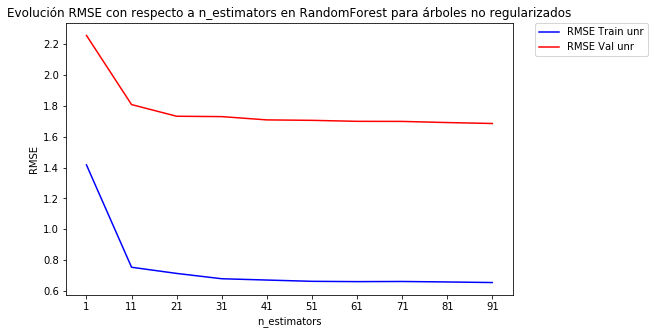

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))

xi = list(range(len(estimators)))
plt.plot(xi, randomforest_model_unr_train, linestyle='-', color='b', label='RMSE Train unr')
plt.plot(xi, randomforest_model_unr_val, linestyle='-', color='r', label='RMSE Val unr')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(xi, estimators)
plt.xlabel("n_estimators")
plt.ylabel("RMSE")
plt.title("Evolución RMSE con respecto a n_estimators en RandomForest para árboles no regularizados")
plt.show()

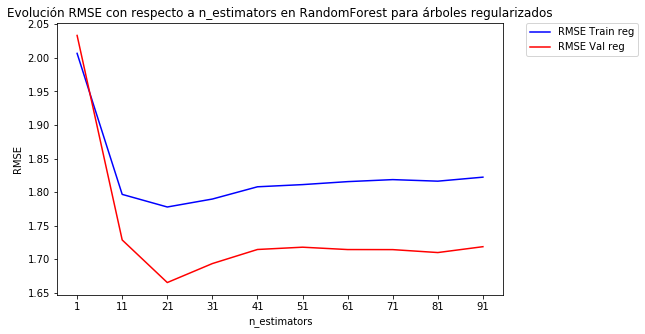

In [21]:
plt.figure(figsize=(8,5))

xi = list(range(len(estimators)))
plt.plot(xi, randomforest_model_reg_train, linestyle='-', color='b', label='RMSE Train reg')
plt.plot(xi, randomforest_model_reg_val, linestyle='-', color='r', label='RMSE Val reg')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(xi, estimators)
plt.xlabel("n_estimators")
plt.ylabel("RMSE")
plt.title("Evolución RMSE con respecto a n_estimators en RandomForest para árboles regularizados")
plt.show()

**R:** Al igual que con técnicas anteriores, sí se visualiza overfitting con el uso de árboles no regularizados.

El gráfico con árboles regularizados para los modelos Bagging y RandomForest son casi idénticos.

> g) Verifique que el **OOB error** (*out of bag error*) de los ensambladores que utilizan la técnica *boostrap* puede ser una alternativa como métrica de generalización, compare con el error calculado sobre el conjunto de validación (o en su defecto *cross validation*).

In [22]:
base_model_reg = DecisionTreeRegressor(max_depth = 126,
                                       min_samples_split = 127)

#Usándose los árboles que entregan RMSE más bajo en conjunto de validación:
bagging_model_unr = BaggingRegressor(base_estimator = DecisionTreeRegressor(), n_estimators = 91, n_jobs = -1, random_state = 0, oob_score = True)
bagging_model_unr.fit(X_train, y_train)
bagging_model_reg = BaggingRegressor(base_estimator = base_model_reg, n_estimators = 21, n_jobs = -1, random_state = 0, oob_score = True)
bagging_model_reg.fit(X_train, y_train)

randomforest_model_unr = RandomForestRegressor(n_estimators = 91, n_jobs = -1, random_state = 0, oob_score = True)
randomforest_model_unr.fit(X_train, y_train)
randomforest_model_reg = RandomForestRegressor(max_depth = 126, min_samples_split = 127, n_estimators = 21, n_jobs = -1, random_state = 0, oob_score = True)
randomforest_model_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=126,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=127,
                      min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=-1,
                      oob_score=True, random_state=0, verbose=0,
                      warm_start=False)

In [23]:
print("Bagging no regularizado")
oob_error_bagging_unr = bagging_model_unr.oob_score_
val_error_bagging_unr = bagging_model_unr.score(X_val, y_val)
print("OOB error:", oob_error_bagging_unr)
print("Val error:", val_error_bagging_unr)
print("-------------------------")
print("Bagging regularizado")
oob_error_bagging_reg = bagging_model_reg.oob_score_
val_error_bagging_reg = bagging_model_reg.score(X_val, y_val)
print("OOB error:", oob_error_bagging_reg)
print("Val error:", val_error_bagging_reg)
print("-------------------------")
print("Random Forest no regularizado")
oob_error_randomforest_unr = randomforest_model_unr.oob_score_
val_error_randomforest_unr = randomforest_model_unr.score(X_val, y_val)
print("OOB error:", oob_error_randomforest_unr)
print("Val error:", val_error_randomforest_unr)
print("-------------------------")
print("Random Forest regularizado")
oob_error_randomforest_reg = randomforest_model_reg.oob_score_
val_error_randomforest_reg = randomforest_model_reg.score(X_val, y_val)
print("OOB error:", oob_error_randomforest_reg)
print("Val error:", val_error_randomforest_reg)

Bagging no regularizado
OOB error: 0.94454878287547
Val error: 0.9431571079967535
-------------------------
Bagging regularizado
OOB error: 0.9337896270659316
Val error: 0.9441429633550118
-------------------------
Random Forest no regularizado
OOB error: 0.9440588681903689
Val error: 0.943412683926573
-------------------------
Random Forest regularizado
OOB error: 0.9346161316132013
Val error: 0.9447592678827513


**R:** Se puede ver que en todos los errores calculados en cada modelo los valores son muy parecidos, por lo que efectivamente esta técnica puede ser una alternativa.

> h) Defina otra forma de combinar los valores que entregan los ensamblados al hacer predicciones y compare con lo que se hace actualmente, por ejemplo *Bagging* realiza el voto de la mayoría para clasificación y promedio para regresión, *AdaBoost* realiza una combinación ponderada de cada clasificador dependiendo de su *habilidad* (desempeño para clasificar el conjunto de entrenamiento). Se puede inspirar desde clásicos estadísticos, como entregar el primer cuartíl ($Q_1$) si al ensamblado le cuesta predecir valores bajos, o el segundo cuartil ($Q_2$) o mediana para ser robusto a predicciones atípicas de modelos. 

In [24]:
from scipy import stats

#Se define el uso de la moda para combinar predicciones
def combine_predictions(predictions):
    pred_array = np.array(predictions)
    return stats.mode(pred_array)

base_model_reg = DecisionTreeRegressor(max_depth = 126,
                                       min_samples_split = 127)

#Como en inciso g) ya se definieron los mejores modelos para baggingregressor y randomforest,
#en este inciso solo se definirá el mejor modelo de adaboost.
adaboost_model_unr = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(), n_estimators = 91, random_state = 0)
adaboost_model_unr.fit(X_train, y_train)
adaboost_model_reg = AdaBoostRegressor(base_estimator = base_model_reg, n_estimators = 31, random_state = 0)
adaboost_model_reg.fit(X_train, y_train)

nombre_model = []
nombre_model.append("bagging_model_unr")
nombre_model.append("bagging_model_reg")
nombre_model.append("adaboost_model_unr")
nombre_model.append("adaboost_model_reg")
nombre_model.append("randomforest_model_unr")
nombre_model.append("randomforest_model_reg")

list_model = []
list_model.append(bagging_model_unr)
list_model.append(bagging_model_reg)
list_model.append(adaboost_model_unr)
list_model.append(adaboost_model_reg)
list_model.append(randomforest_model_unr)
list_model.append(randomforest_model_reg)

cont = 0
for i in list_model:
    list_estimators = i.estimators_
    list_predictions = [estimator.predict(X_val) for estimator in list_estimators]
    new_predictions = combine_predictions(list_predictions)
    print("Evaluando modelo", nombre_model[cont])
    cont = cont + 1
    print("RMSE usando lo pre-definido =", RMSE(y_val, i.predict(X_val)))
    print("RMSE en conjunto de validación usando la moda =", RMSE(y_val, new_predictions))
    print("--------------------------------")

Evaluando modelo bagging_model_unr
RMSE usando lo pre-definido = 1.689248554326297
RMSE en conjunto de validación usando la moda = 9.355987757281465
--------------------------------
Evaluando modelo bagging_model_reg
RMSE usando lo pre-definido = 1.6745357313287723
RMSE en conjunto de validación usando la moda = 18.35546130598648
--------------------------------
Evaluando modelo adaboost_model_unr
RMSE usando lo pre-definido = 1.725517053343094
RMSE en conjunto de validación usando la moda = 10.434279150027272
--------------------------------
Evaluando modelo adaboost_model_reg
RMSE usando lo pre-definido = 1.69324988769399
RMSE en conjunto de validación usando la moda = 18.59678320525054
--------------------------------
Evaluando modelo randomforest_model_unr
RMSE usando lo pre-definido = 1.685446692437692
RMSE en conjunto de validación usando la moda = 9.376323087040346
--------------------------------
Evaluando modelo randomforest_model_reg
RMSE usando lo pre-definido = 1.6652720237

**R:** En resumen, usar la moda como forma de combinar valores que entregan los ensamblados al hacer predicciones es una terrible decisión. Algo interesante a notar es que usándose la moda, el RMSE es menor en ensamblados que usan modelos no regularizados en comparación a los que sí usan modelos regularizados.

> i) Si se cuenta con una gran cantidad de modelos en el ensamblado, por ejemplo $T>100$, se puede crear un intervalo de confianza de la predicción a través de todos estos valores, asumiendo una distribución Normal centrada en la media muestral de las predicciones, con desviación estándar muestral en las predicciones. El intervalo de confianza entrega más información que un único valor puntual de predicción. Visualice un intervalo de confianza al 95% de probabilidad en la predicción a lo largo de la serie de tiempo de validación, comente. Al asumir una distribución Normal, también puede explorar el tomar como predicción del ensamblado el muestreo sobre la distribución Normal creada entorno a los datos muestrales.

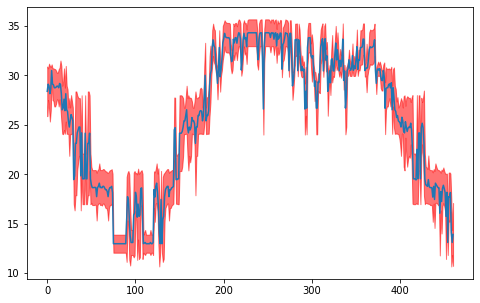

In [25]:
bagging_model_reg = BaggingRegressor(base_estimator = base_model_reg, n_estimators = 121, n_jobs = -1, random_state = 0, oob_score = True)
bagging_model_reg.fit(X_train, y_train)
list_estimators = bagging_model_reg.estimators_
list_predictions = [estimator.predict(X_val) for estimator in list_estimators]

X_val_est = np.vstack(list_predictions).T #has shape=(N_test, n_estimator), with n_estimator>100
from scipy.stats import norm
interv_val = []
for n in range(X_val.shape[0]):
    low, up = norm.interval(0.95, loc=np.mean(X_val_est[n]), scale=np.std(X_val_est[n]))
    interv_val.append([low,up])
interv_val = np.asarray(interv_val)
x = np.arange(X_val_est.shape[0])
plt.figure(figsize=(8,5))
plt.plot(x, np.mean(X_val_est, axis=1))
plt.fill_between(x, interv_val[:,0], interv_val[:,1], color='r', alpha=.55)
plt.show()

**R:** Como se ve en el gráfico, el intervalo (color rojo) encierra el valor puntual (color azul). Como el uso de intervalos involucra dos valores (mínimo y máximo) se puede extraer más información en comparación a la que se puede del valor puntual que involucra un valor.

>  j) Evalúe y visualice la predicción del mejor modelo encontrado para resolver este problema, en el conjunto de pruebas. Además, compare y analice las distintas maneras con las que se resolvió el problema, incluya las decisiones que conlleva y los resultados que reflejan.

In [26]:
print("RMSE más bajo de cada modelo en el conjunto de validación:")
print("min RMSE Bagging Unr:", min(bagging_model_unr_val))
print("min RMSE Bagging Reg:", min(bagging_model_reg_val))
print("min RMSE AdaBoost Unr:", min(adaboost_model_unr_val))
print("min RMSE AdaBoost Reg:", min(adaboost_model_reg_val))
print("min RMSE RandomForest Unr:", min(randomforest_model_unr_val))
print("min RMSE RandomForest Reg:", min(randomforest_model_reg_val))

RMSE más bajo de cada modelo en el conjunto de validación:
min RMSE Bagging Unr: 1.689248554326297
min RMSE Bagging Reg: 1.6745357313287723
min RMSE AdaBoost Unr: 1.725517053343094
min RMSE AdaBoost Reg: 1.69324988769399
min RMSE RandomForest Unr: 1.6854466924376923
min RMSE RandomForest Reg: 1.6652720237848766


El RMSE mínimo de todos es usándose RandomForest con árboles regularizados y n_estimators = 21.

In [27]:
randomforest_model_reg = RandomForestRegressor(max_depth = 126, min_samples_split = 127, n_estimators = 21, n_jobs = -1, random_state = 0, oob_score = True)
randomforest_model_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=126,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=127,
                      min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=-1,
                      oob_score=True, random_state=0, verbose=0,
                      warm_start=False)

**Se hace el mismo pre-procesamiento al nuevo dataframe, para que el modelo pueda predecir sin problemas.**

In [28]:
df_test = pd.read_csv("DailyDelhiClimateTest.csv")
df_test["y_value"] = df_test["meantemp"].shift(-1)
df_test = df_test.iloc[:-1] #remove last row

In [29]:
df_test.head()

,date,meantemp,humidity,wind_speed,meanpressure,y_value
0,2017-01-01,15.913043,85.869565,2.743478,59.000000,18.500000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,17.111111
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,18.700000
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,18.388889
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,19.318182


In [30]:
df_test.values[0]

array(['2017-01-01', 15.91304347826087, 85.8695652173913,
       2.743478260869565, 59.0, 18.5], dtype=object)

In [31]:
df_test.values[-1]

array(['2017-04-23', 32.875, 27.5, 9.9625, 1002.125, 32.0], dtype=object)

Como se ve en las celdas de arriba, el dataset de test está entre el 1 de Enero de 2017 y 24 de Abril de 2017, según "https://en.wikipedia.org/wiki/Climate_of_India", en los dos primeros meses se está en invierno y los dos siguientes en verano.

In [32]:
#procesamiento de fecha(datetime/timestamp) a numeros
df_test["date"] = pd.to_datetime(df_test["date"])
df_test['cday'] = df_test['date'].dt.dayofweek #0:lunes,6:domingo
df_test['year'] = df_test['date'].dt.year
df_test['month'] = df_test['date'].dt.month #1:enero, 12: diciembre
#based on: https://en.wikipedia.org/wiki/Climate_of_India
seasons = ["winter","winter","summer","summer","summer","rainy","rainy","rainy","fall","fall","fall","winter"]
df_test['season'] = [ seasons[month_i - 1] for month_i in df_test['month'].values ]
season_fall = np.zeros(113, dtype = np.int8) #114
season_rainy = np.zeros(113, dtype = np.int8)
df_test["season_fall"] = season_fall
df_test["season_rainy"] = season_rainy
df_test = pd.get_dummies(df_test,columns=['season']) #to one hot.. as nominal variable
#any more information?
df_test.drop(["date"], axis=1, inplace=True) #delete date

In [33]:
df_test.head()

,meantemp,humidity,wind_speed,meanpressure,y_value,cday,year,month,season_fall,season_rainy,season_summer,season_winter
0,15.913043,85.869565,2.743478,59.000000,18.500000,6,2017,1,0,0,0,1
1,18.500000,77.222222,2.894444,1018.277778,17.111111,0,2017,1,0,0,0,1
2,17.111111,81.888889,4.016667,1018.333333,18.700000,1,2017,1,0,0,0,1
3,18.700000,70.050000,4.545000,1015.700000,18.388889,2,2017,1,0,0,0,1
4,18.388889,74.944444,3.300000,1014.333333,19.318182,3,2017,1,0,0,0,1


In [34]:
y = df_test.pop("y_value").values
X = df_test.values

In [35]:
from sklearn.metrics import r2_score
y_pred = randomforest_model_reg.predict(X)
r2_score(y, y_pred)

0.9222167680577851

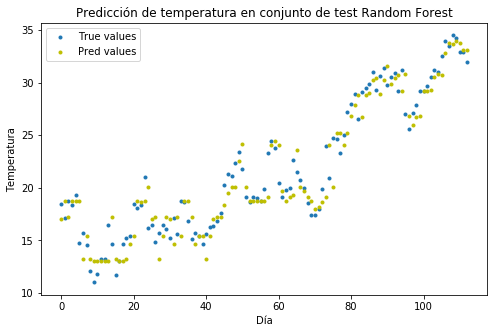

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y, '.' ,label="True values")
plt.plot(y_pred, '.', color = 'y', label = "Pred values")
plt.legend()
plt.xlabel("Día")
plt.ylabel("Temperatura")
plt.title("Predicción de temperatura en conjunto de test Random Forest")
plt.show()